In [6]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install datasets


You should consider upgrading via the '/Users/affanijaz/Documents/GitHub/Emotion-Recognition-Chat-Interface/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/affanijaz/Documents/GitHub/Emotion-Recognition-Chat-Interface/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/affanijaz/Documents/GitHub/Emotion-Recognition-Chat-Interface/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 515 kB 4.0 MB/s eta 0:00:01
  Using cached pyarrow-21.0.0-cp39-cp39-macosx_12_0_arm64.whl (31.2 MB)
     |████████████████████████████████| 133 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 5.1 MB/s eta 0:00:01
  Using cached xxhash-3.6.0-cp39-cp

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

/Users/affanijaz/Documents/GitHub/Emotion-Recognition-Chat-Interface/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/affanijaz/Documents/GitHub/Emotion-Recognition-Chat-Interface/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the GoEmotions dataset

In [8]:
# loading the dataset from huggingface and converting it to a pandas Dataframe
# splitting the dataset into train, validation and test sets
dataset = load_dataset("google-research-datasets/go_emotions", "simplified")
df = pd.DataFrame(dataset['train'])

Generating test split: 100%|██████████| 5427/5427 [00:00<00:00, 1625311.52 examples/s]


In [9]:
df.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


Creating a mapping of the emotions to ekmans model of emotions

In [21]:
ekman_mapping = {
    "anger": [0, 1, 8],
    "disgust": [9],
    "fear": [12, 17],
    "joy": [15, 2, 3, 6, 11, 13, 16, 18, 19, 21],
    "sadness": [23, 7, 10, 14, 22],
    "surprise": [24, 4, 5, 20]
}

Applying the mapping and removing the neutral samples

In [29]:
def mapping_to_ekman(label_list):
    # iterating through the ekman mapping dictionary 
    # for multi label samples the first emotion found will be assigned to ensure consistency
    for ekman_name, id_list in ekman_mapping.items():
        # checking if any of the label ids are in the ekman mapping
        if any(id in label_list for id in id_list):
            # returning the ekman name if found
            return ekman_name
    return "neutral"

# applying the the maping
df['ekman'] = df['labels'].apply(mapping_to_ekman)

# removing the neutral samlpes from the dataframe
df_new_emotional = df[df['ekman'] != 'neutral'].copy()

In [30]:
df_new_emotional['ekman'].value_counts()

ekman
joy         10165
anger        6972
sadness      4712
surprise     4381
fear         1509
disgust      1223
Name: count, dtype: int64

Visualising the count of smaples for each emotion

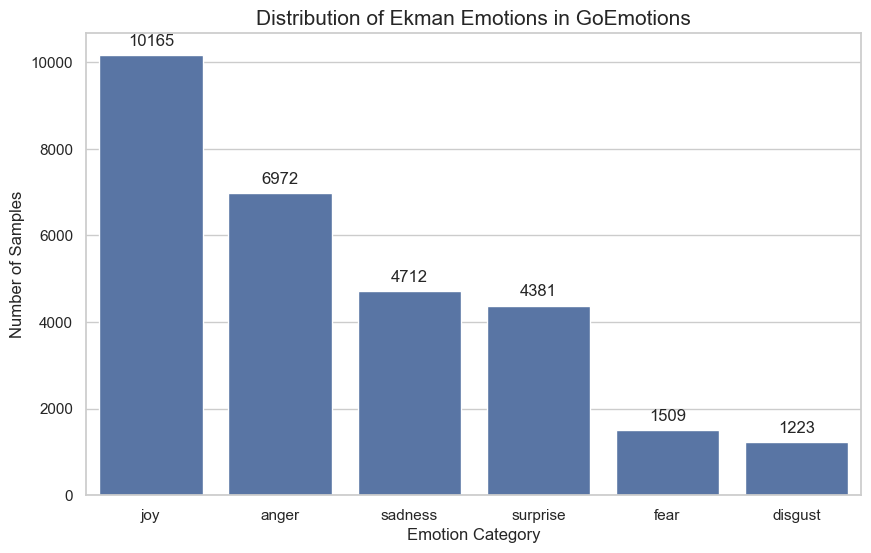

In [33]:
plt.figure(figsize=(10, 6))

# creating the count plot
order = df_new_emotional['ekman'].value_counts().index
ax = sns.countplot(data=df_new_emotional, x='ekman', order=order)

# adding labels and title
plt.title("Distribution of Ekman Emotions in GoEmotions", fontsize=15)
plt.xlabel("Emotion Category")
plt.ylabel("Number of Samples")

# addign the total counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

We can clearly see an imbalance, with joy haveing a vast majority comapred to fear and disgust